2025-10-30 02:53:49.028148: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761792829.205473      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761792829.258513      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loading Brain Cancer dataset...
Loading data from: /kaggle/input/multi-cancer/Multi Cancer/Multi Cancer/Brain Cancer
Available folders in dataset: ['brain_tumor', 'brain_glioma', 'brain_menin']
Found 15000 files belonging to 3 classes.
Using 12000 files for training.


I0000 00:00:1761792862.618956      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Found 15000 files belonging to 3 classes.
Using 3000 files for validation.
Actual class names from dataset: ['brain_glioma', 'brain_menin', 'brain_tumor']

Final classes for training: ['brain_glioma', 'brain_menin', 'brain_tumor']
Number of classes: 3

Creating model...
43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "brain_cancer_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb3 (Functional)     │ (None, 7, 7, 1536)     │    10,783,535 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1536)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       786,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,704,626 (44.65 MB)

 Trainable params: 920,067 (3.51 MB)

 Non-trainable params: 10,784,559 (41.14 MB)


Training model...
Epoch 1/20


I0000 00:00:1761792895.415935      87 service.cc:148] XLA service 0x7f40340032c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761792895.416631      87 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1761792898.561724      87 cuda_dnn.cc:529] Loaded cuDNN version 90300


  3/375 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.3906 - auc: 0.5001 - loss: 1.5978 

I0000 00:00:1761792914.132278      87 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


375/375 ━━━━━━━━━━━━━━━━━━━━ 106s 167ms/step - accuracy: 0.6735 - auc: 0.8373 - loss: 0.7810 - val_accuracy: 0.9097 - val_auc: 0.9835 - val_loss: 0.2413 - learning_rate: 1.0000e-04
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.8608 - auc: 0.9646 - loss: 0.3567 - val_accuracy: 0.9370 - val_auc: 0.9916 - val_loss: 0.1674 - learning_rate: 1.0000e-04
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.8963 - auc: 0.9767 - loss: 0.2837 - val_accuracy: 0.9550 - val_auc: 0.9951 - val_loss: 0.1282 - learning_rate: 1.0000e-04
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.8993 - auc: 0.9800 - loss: 0.2622 - val_accuracy: 0.9580 - val_auc: 0.9965 - val_loss: 0.1105 - learning_rate: 1.0000e-04
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.9078 - auc: 0.9848 - loss: 0.2317 - val_accuracy: 0.9690 - val_auc: 0.9979 - val_loss: 0.0865 - learning_rate: 1.0000e-04
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - acc

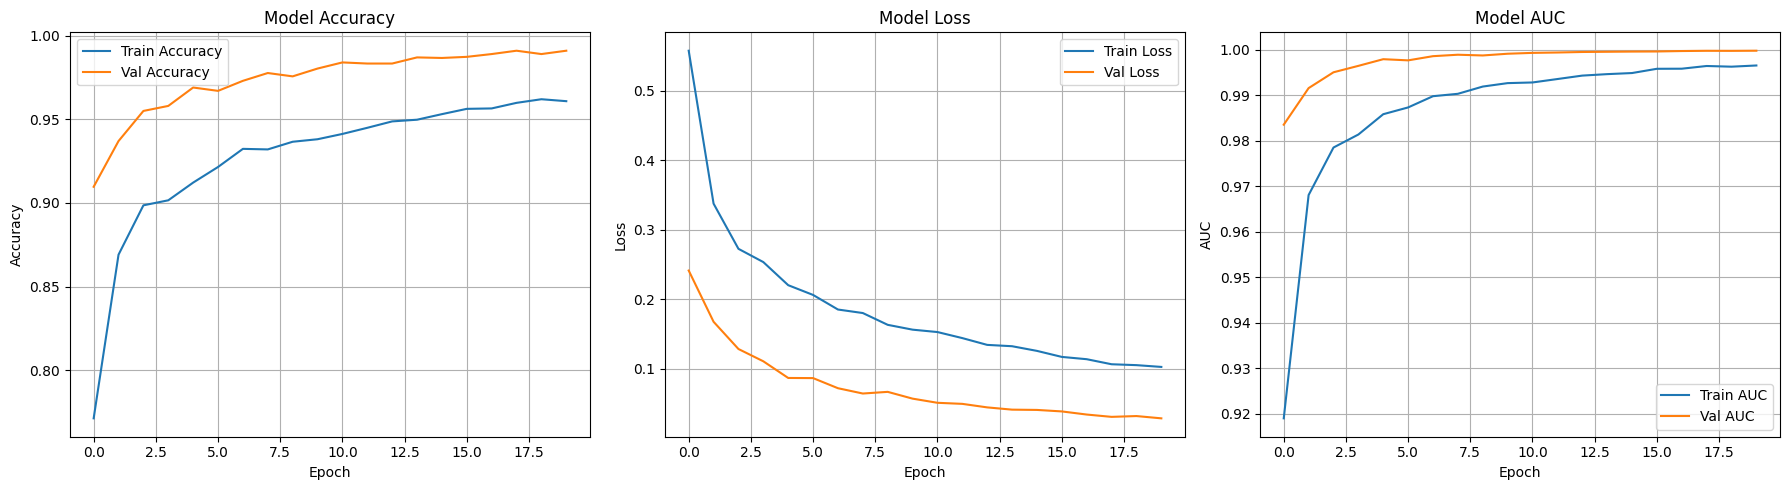


Evaluating model...
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9928 - auc: 0.9998 - loss: 0.0262
Validation Loss: 0.0283
Validation Accuracy: 0.9910
Validation AUC: 0.9998


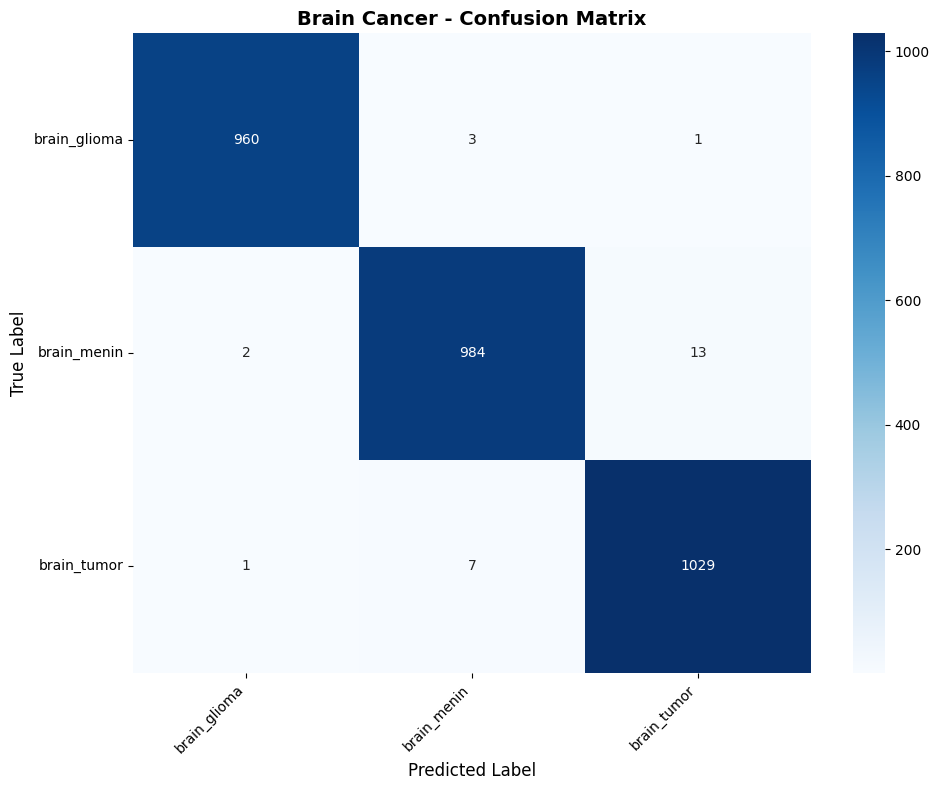


Classification Report:
              precision    recall  f1-score   support

brain_glioma       1.00      1.00      1.00       964
 brain_menin       0.99      0.98      0.99       999
 brain_tumor       0.99      0.99      0.99      1037

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000


Per-Class Accuracy:
  brain_glioma: 0.9959
  brain_menin: 0.9850
  brain_tumor: 0.9923


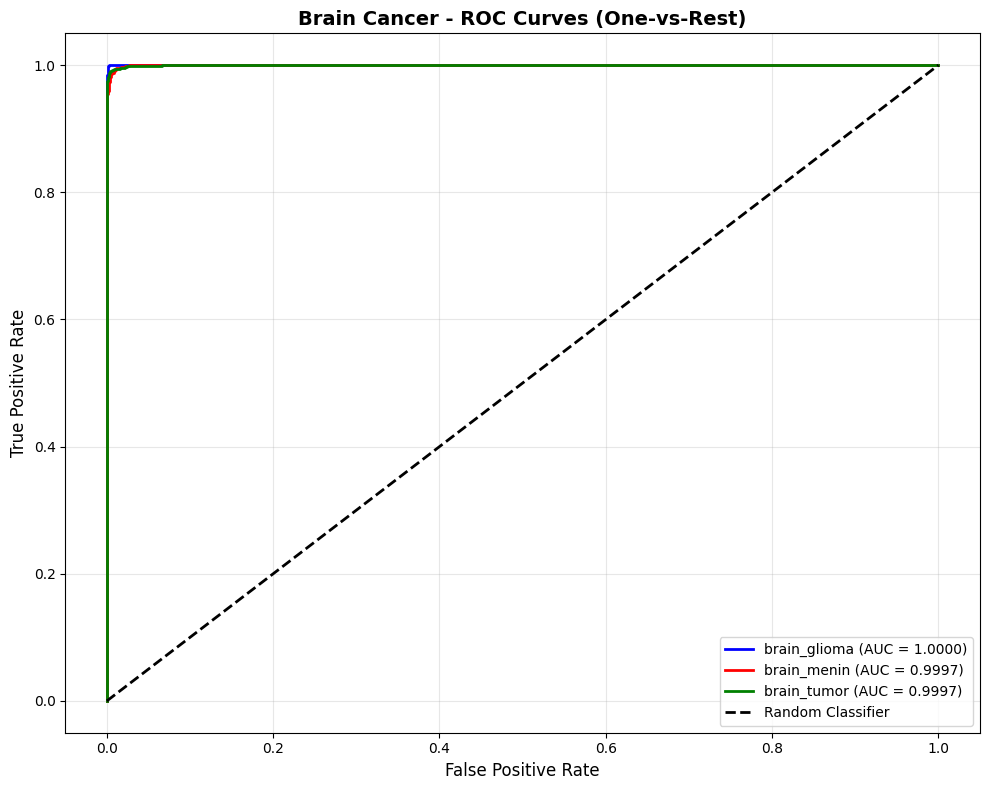


SAVING MODELS
✓ Saved Keras model: brain_cancer_model.keras
✓ Saved H5 model: brain_cancer_model.h5
✓ Saved TensorFlow SavedModel: brain_cancer_savedmodel

CONVERTING TO ONNX FORMAT
Installing tf2onnx and onnx...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 103.3 MB/s eta 0:00:00
✓ tf2onnx and onnx installed successfully

Converting model to ONNX format...
Input shape: (None, 224, 224, 3)
Output shape: (None, 3)


I0000 00:00:1761793475.828129      36 devices.cc:67] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
I0000 00:00:1761793475.828320      36 single_machine.cc:361] Starting new session
I0000 00:00:1761793475.829368      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
I0000 00:00:1761793483.307532      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
I0000 00:00:1761793485.173779      36 devices.cc:67] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
I0000 00:00:1761793485.173997      36 single_machine.cc:361] Starting new session
I0000 00:00:1761793485.175031      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 wi

✓ Saved ONNX model: brain_cancer_model.onnx

Verifying ONNX model...
✓ ONNX model is valid!

ONNX Model Information:
  - IR Version: 8
  - Producer: tf2onnx
  - Opset: 15
  - Input: input
  - Output: dense_2

TESTING ONNX MODEL
Installing onnxruntime...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.2 MB/s eta 0:00:00
✓ onnxruntime installed successfully

Comparing Keras vs ONNX predictions:
Keras prediction shape: (32, 3)
ONNX prediction shape: (32, 3)
Max difference: 0.00000274

Sample predictions (first 3 images):

  Image 1:
    Keras:  [9.8968667e-01 1.0175507e-02 1.3779082e-04]
    ONNX:   [9.8968667e-01 1.0175506e-02 1.3778951e-04]
    Predicted: brain_glioma (Keras) vs brain_glioma (ONNX)

  Image 2:
    Keras:  [2.068095e-08 4.824620e-06 9.999951e-01]
    ONNX:   [2.0680792e-08 4.8246343e-06 9.9999511e-01]
    

In [1]:
# ==================================================================================
# BRAIN CANCER CLASSIFICATION WITH PROPER SAVING AND ONNX CONVERSION
# THREE-CLASS CLASSIFICATION
# ==================================================================================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
tf.random.set_seed(42)

# ==================================================================================
# CONFIGURATION
# ==================================================================================

DATASET_ROOT = '/kaggle/input/multi-cancer/Multi Cancer/Multi Cancer'
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
LEARNING_RATE = 1e-4

CANCER_CONFIGS = {
    'Brain_Cancer': {
        'folder': 'Brain Cancer',
        # Common brain tumor classes - adjust based on your actual folder names
        'classes': ['glioma', 'meningioma', 'pituitary'],
        'class_names': ['Glioma', 'Meningioma', 'Pituitary']
    }
}

# ==================================================================================
# DATA LOADING AND PREPROCESSING
# ==================================================================================

def load_brain_cancer_data():
    """Load and prepare Brain Cancer dataset"""
    config = CANCER_CONFIGS['Brain_Cancer']
    data_dir = os.path.join(DATASET_ROOT, config['folder'])
    
    print(f"Loading data from: {data_dir}")
    
    # List available folders to verify class names
    if os.path.exists(data_dir):
        available_folders = os.listdir(data_dir)
        print(f"Available folders in dataset: {available_folders}")
    
    # Create dataset
    train_ds = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        validation_split=0.2,
        subset="training",
        seed=42,
        image_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        label_mode='categorical'
    )
    
    val_ds = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        validation_split=0.2,
        subset="validation",
        seed=42,
        image_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        label_mode='categorical'
    )
    
    # Get actual class names from dataset
    actual_class_names = train_ds.class_names
    print(f"Actual class names from dataset: {actual_class_names}")
    
    # Optimize performance
    AUTOTUNE = tf.data.AUTOTUNE
    train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
    val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
    
    return train_ds, val_ds, actual_class_names

# Load data
print("Loading Brain Cancer dataset...")
train_ds, val_ds, class_names = load_brain_cancer_data()
print(f"\nFinal classes for training: {class_names}")
print(f"Number of classes: {len(class_names)}")

# ==================================================================================
# MODEL ARCHITECTURE
# ==================================================================================

def create_brain_cancer_model(num_classes=3):
    """Create EfficientNetB3-based model for brain cancer classification"""
    
    base_model = EfficientNetB3(
        include_top=False,
        weights='imagenet',
        input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)
    )
    
    # Freeze base model initially
    base_model.trainable = False
    
    # Build model
    inputs = keras.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    model = keras.Model(inputs, outputs, name='brain_cancer_classifier')
    
    return model

# Create model
print("\nCreating model...")
model = create_brain_cancer_model(num_classes=len(class_names))
model.summary()

# ==================================================================================
# TRAINING
# ==================================================================================

# Compile model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=['accuracy', keras.metrics.AUC(name='auc')]
)

# Callbacks
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-7,
        verbose=1
    )
]

# Train model
print("\nTraining model...")
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=callbacks,
    verbose=1
)

# ==================================================================================
# EVALUATION
# ==================================================================================

def plot_training_history(history):
    """Plot training history"""
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Accuracy
    axes[0].plot(history.history['accuracy'], label='Train Accuracy')
    axes[0].plot(history.history['val_accuracy'], label='Val Accuracy')
    axes[0].set_title('Model Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()
    axes[0].grid(True)
    
    # Loss
    axes[1].plot(history.history['loss'], label='Train Loss')
    axes[1].plot(history.history['val_loss'], label='Val Loss')
    axes[1].set_title('Model Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].legend()
    axes[1].grid(True)
    
    # AUC
    axes[2].plot(history.history['auc'], label='Train AUC')
    axes[2].plot(history.history['val_auc'], label='Val AUC')
    axes[2].set_title('Model AUC')
    axes[2].set_xlabel('Epoch')
    axes[2].set_ylabel('AUC')
    axes[2].legend()
    axes[2].grid(True)
    
    plt.tight_layout()
    plt.savefig('brain_training_history.png', dpi=300, bbox_inches='tight')
    plt.show()

# Plot training history
plot_training_history(history)

# Evaluate on validation set
print("\nEvaluating model...")
val_loss, val_accuracy, val_auc = model.evaluate(val_ds)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation AUC: {val_auc:.4f}")

# ==================================================================================
# CONFUSION MATRIX AND CLASSIFICATION REPORT
# ==================================================================================

# Get predictions
y_true = []
y_pred = []
y_pred_proba = []

for images, labels in val_ds:
    predictions = model.predict(images, verbose=0)
    y_pred_proba.extend(predictions)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(np.argmax(labels.numpy(), axis=1))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Brain Cancer - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('brain_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Per-class accuracy
print("\nPer-Class Accuracy:")
for i, class_name in enumerate(class_names):
    class_mask = np.array(y_true) == i
    if class_mask.sum() > 0:
        class_accuracy = (np.array(y_pred)[class_mask] == i).sum() / class_mask.sum()
        print(f"  {class_name}: {class_accuracy:.4f}")

# ROC Curve for multi-class (One-vs-Rest)
from sklearn.preprocessing import label_binarize

y_true_bin = label_binarize(y_true, classes=range(len(class_names)))
y_pred_proba_array = np.array(y_pred_proba)

plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange', 'purple']

for i, class_name in enumerate(class_names):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_proba_array[:, i])
    auc_score = roc_auc_score(y_true_bin[:, i], y_pred_proba_array[:, i])
    plt.plot(fpr, tpr, label=f'{class_name} (AUC = {auc_score:.4f})', 
             linewidth=2, color=colors[i % len(colors)])

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=2)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Brain Cancer - ROC Curves (One-vs-Rest)', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('brain_roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# ==================================================================================
# SAVE MODEL IN MULTIPLE FORMATS
# ==================================================================================

print("\n" + "="*80)
print("SAVING MODELS")
print("="*80)

# 1. Save in Keras format (.keras) - Recommended TF 2.x format
keras_model_path = 'brain_cancer_model.keras'
model.save(keras_model_path)
print(f"✓ Saved Keras model: {keras_model_path}")

# 2. Save in H5 format (legacy)
h5_model_path = 'brain_cancer_model.h5'
model.save(h5_model_path)
print(f"✓ Saved H5 model: {h5_model_path}")

# 3. Save in SavedModel format (Keras 3 compatible)
savedmodel_path = 'brain_cancer_savedmodel'
tf.saved_model.save(model, savedmodel_path)
print(f"✓ Saved TensorFlow SavedModel: {savedmodel_path}")

# ==================================================================================
# CONVERT TO ONNX FORMAT
# ==================================================================================

print("\n" + "="*80)
print("CONVERTING TO ONNX FORMAT")
print("="*80)

# Install tf2onnx if not already installed
import subprocess
import sys

try:
    import tf2onnx
    import onnx
    print("✓ tf2onnx and onnx already installed")
except ImportError:
    print("Installing tf2onnx and onnx...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "tf2onnx", "onnx"])
    import tf2onnx
    import onnx
    print("✓ tf2onnx and onnx installed successfully")

# Convert to ONNX
onnx_model_path = 'brain_cancer_model.onnx'

print(f"\nConverting model to ONNX format...")
print(f"Input shape: {model.input_shape}")
print(f"Output shape: {model.output_shape}")

# Method 1: Convert from Keras model directly
input_signature = [tf.TensorSpec(shape=model.input_shape, dtype=tf.float32, name='input')]
onnx_model, _ = tf2onnx.convert.from_keras(model, input_signature, opset=15)
onnx.save(onnx_model, onnx_model_path)
print(f"✓ Saved ONNX model: {onnx_model_path}")

# Verify ONNX model
print(f"\nVerifying ONNX model...")
onnx_model_check = onnx.load(onnx_model_path)
onnx.checker.check_model(onnx_model_check)
print("✓ ONNX model is valid!")

# Get model info
print(f"\nONNX Model Information:")
print(f"  - IR Version: {onnx_model_check.ir_version}")
print(f"  - Producer: {onnx_model_check.producer_name}")
print(f"  - Opset: {onnx_model_check.opset_import[0].version}")
print(f"  - Input: {onnx_model_check.graph.input[0].name}")
print(f"  - Output: {onnx_model_check.graph.output[0].name}")

# ==================================================================================
# TEST ONNX MODEL
# ==================================================================================

print("\n" + "="*80)
print("TESTING ONNX MODEL")
print("="*80)

try:
    import onnxruntime as ort
    print("✓ onnxruntime already installed")
except ImportError:
    print("Installing onnxruntime...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "onnxruntime"])
    import onnxruntime as ort
    print("✓ onnxruntime installed successfully")

# Create ONNX Runtime session
ort_session = ort.InferenceSession(onnx_model_path, providers=['CPUExecutionProvider'])

# Get a sample batch from validation set
for sample_images, sample_labels in val_ds.take(1):
    # Test with Keras model
    keras_predictions = model.predict(sample_images, verbose=0)
    
    # Test with ONNX model
    onnx_inputs = {ort_session.get_inputs()[0].name: sample_images.numpy()}
    onnx_predictions = ort_session.run(None, onnx_inputs)[0]
    
    # Compare predictions
    print(f"\nComparing Keras vs ONNX predictions:")
    print(f"Keras prediction shape: {keras_predictions.shape}")
    print(f"ONNX prediction shape: {onnx_predictions.shape}")
    print(f"Max difference: {np.max(np.abs(keras_predictions - onnx_predictions)):.8f}")
    
    # Show sample predictions
    print(f"\nSample predictions (first 3 images):")
    for i in range(min(3, len(keras_predictions))):
        print(f"\n  Image {i+1}:")
        print(f"    Keras:  {keras_predictions[i]}")
        print(f"    ONNX:   {onnx_predictions[i]}")
        keras_class = class_names[np.argmax(keras_predictions[i])]
        onnx_class = class_names[np.argmax(onnx_predictions[i])]
        print(f"    Predicted: {keras_class} (Keras) vs {onnx_class} (ONNX)")
    
    if np.allclose(keras_predictions, onnx_predictions, atol=1e-4):
        print("\n✓ ONNX predictions match Keras predictions!")
    else:
        print("\n⚠ Warning: Small differences detected (this is normal due to numerical precision)")

# ==================================================================================
# SAVE METADATA AND CLASS INFORMATION
# ==================================================================================

import json

# Calculate per-class metrics
per_class_metrics = {}
for i, class_name in enumerate(class_names):
    class_mask = np.array(y_true) == i
    if class_mask.sum() > 0:
        class_accuracy = (np.array(y_pred)[class_mask] == i).sum() / class_mask.sum()
        per_class_metrics[class_name] = {
            'accuracy': float(class_accuracy),
            'samples': int(class_mask.sum())
        }

metadata = {
    'model_name': 'brain_cancer_classifier',
    'cancer_type': 'Brain Cancer',
    'classes': class_names,
    'num_classes': len(class_names),
    'input_shape': list(model.input_shape[1:]),
    'img_size': IMG_SIZE,
    'model_architecture': 'EfficientNetB3',
    'validation_accuracy': float(val_accuracy),
    'validation_auc': float(val_auc),
    'validation_loss': float(val_loss),
    'per_class_metrics': per_class_metrics,
    'preprocessing': 'Rescaling to [0, 1]',
    'onnx_opset': 15,
    'classification_type': 'multi-class'
}

with open('brain_cancer_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=4)

print(f"\n✓ Saved metadata: brain_cancer_metadata.json")

# Display metadata
print("\nModel Metadata:")
print(json.dumps(metadata, indent=2))

# ==================================================================================
# SUMMARY
# ==================================================================================

print("\n" + "="*80)
print("MODEL TRAINING AND EXPORT COMPLETE")
print("="*80)
print(f"\nFiles saved:")
print(f"  1. brain_cancer_model.keras - Keras format (recommended)")
print(f"  2. brain_cancer_model.h5 - H5 format (legacy)")
print(f"  3. brain_cancer_savedmodel/ - TensorFlow SavedModel format")
print(f"  4. brain_cancer_model.onnx - ONNX format (for deployment)")
print(f"  5. brain_cancer_metadata.json - Model metadata")
print(f"  6. brain_training_history.png - Training curves")
print(f"  7. brain_confusion_matrix.png - Confusion matrix")
print(f"  8. brain_roc_curves.png - ROC curves for all classes")
print(f"\nModel Performance:")
print(f"  - Validation Accuracy: {val_accuracy:.4f}")
print(f"  - Validation AUC: {val_auc:.4f}")
print(f"  - Validation Loss: {val_loss:.4f}")
print(f"\nPer-Class Performance:")
for class_name, metrics in per_class_metrics.items():
    print(f"  - {class_name}: {metrics['accuracy']:.4f} ({metrics['samples']} samples)")
print(f"\nNext steps:")
print(f"  1. Upload 'brain_cancer_model.onnx' to Hugging Face")
print(f"  2. Upload 'brain_cancer_metadata.json' for reference")
print(f"  3. Use ONNX model in your Streamlit app with onnxruntime")
print("="*80)